In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
dataset_path = '/content/gdrive/MyDrive/Datasets/chest_ray/'

In [3]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline
import os
from sklearn.metrics import accuracy_score, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import cv2
import warnings
warnings.filterwarnings('ignore')


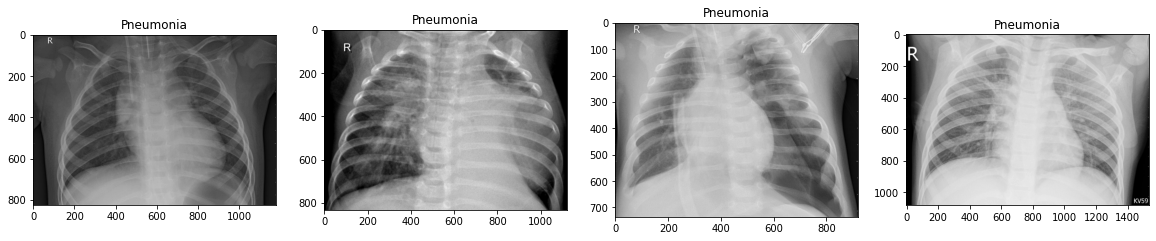

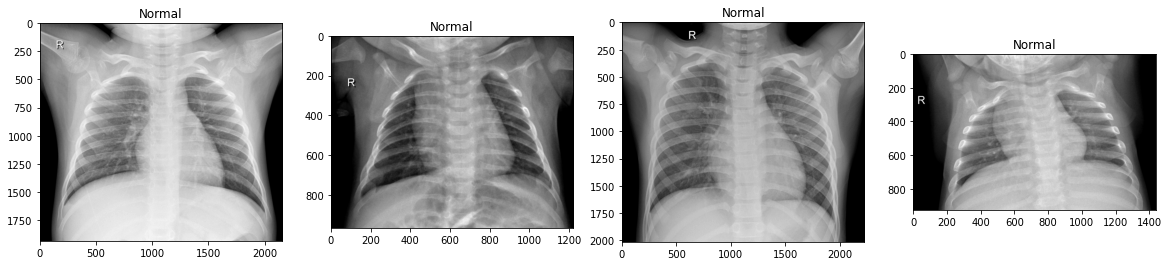

In [9]:
fig = plt.figure(figsize=(20, 10))
path = os.path.join(dataset_path,'train', "PNEUMONIA")

for i in range(8, 12):
    plt.subplot(240 + 1 + i - 8)
    plt.title("Pneumonia")
    img = plt.imread(os.path.join(path, os.listdir(path)[i]))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

fig = plt.figure(figsize=(20, 10))
path = os.path.join(dataset_path,'train', "NORMAL")

for i in range(8, 12):
    plt.subplot(240 + 1 + i - 8)
    plt.title("Normal")
    img = plt.imread(os.path.join(path, os.listdir(path)[i]))
    plt.imshow(img, cmap=plt.get_cmap('gray'))


In [ ]:
print("Validation:")
print ('Normal counts: {}'.format(len(os.listdir(dataset_path + 'validation/NORMAL/'))))
print ('Pneumonia counts: {}\n'.format(len(os.listdir(dataset_path + 'validation/PNEUMONIA/'))))

print("Train:")
print ('Normal counts: {}'.format(len(os.listdir(dataset_path + 'train/NORMAL/'))))
print ('Pneumonia counts: {}\n'.format(len(os.listdir(dataset_path + 'train/PNEUMONIA/'))))

print("Test:")
print ('Normal counts: {}'.format(len(os.listdir(dataset_path + 'test/NORMAL/'))))
print ('Pneumonia counts: {}'.format(len(os.listdir(dataset_path + 'test/PNEUMONIA/'))))

Validation:
Normal counts: 8
Pneumonia counts: 8

Train:
Normal counts: 1280
Pneumonia counts: 3875

Test:
Normal counts: 234
Pneumonia counts: 390


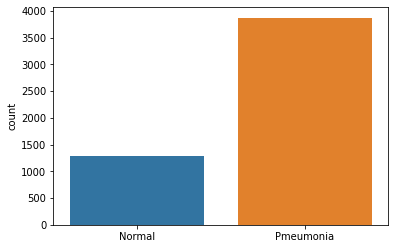

In [ ]:
sns.countplot(
    ["Normal" for i in range(len(os.listdir(dataset_path + 'train/NORMAL/')))] +
                ["Pmeumonia" for i in range(len(os.listdir(dataset_path + 'train/PNEUMONIA/')))],
              )
plt.show()

In [ ]:
src_path_train = dataset_path + 'train/'
src_path_test = dataset_path + 'test/'


train_datagen = ImageDataGenerator(
    rescale=1./255.0,
    horizontal_flip=True,
    zoom_range=0.3
)

test_datagen = ImageDataGenerator(
    rescale=1./255.0
)

In [ ]:
batch_size = 32
image_size = 128

print("Train generator:")
train_generator = train_datagen.flow_from_directory(
    directory=src_path_train,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    seed=42
)

print("\nTest generator:")
test_generator = test_datagen.flow_from_directory(
    directory=src_path_test,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    seed=42
)



Train generator:
Found 5155 images belonging to 2 classes.

Test generator:
Found 624 images belonging to 2 classes.


In [ ]:
def prepare_model():
    model = Sequential()
    model.add(
        Conv2D(32,
               kernel_size=(3,3),
               activation='relu',
              input_shape=(image_size, image_size, 3)))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    model.add(drct_path
        Conv2D(32,
               kernel_size=(3,3),
               activation='relu'
        ))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
        
    model.add(
        Conv2D(32,
               kernel_size=(3,3),
               activation='relu'
        ))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model


In [ ]:
model = prepare_model()

checkpoint = ModelCheckpoint(filepath = 'best_weights.hdf5', save_best_only = True, save_weights_only = True)
lr_reduce = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.3, patience = 2, verbose = 2, mode = 'max')
early_stop = EarlyStopping(monitor = 'val_loss', min_delta = 0.1, patience = 1, mode = 'min')

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 63, 63, 32)        0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 63, 63, 32)        128       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 30, 30, 32)       

In [ ]:
model.fit(
    train_generator,
    validation_data=test_generator,
    steps_per_epoch=
    train_generator.n // train_generator.batch_size,
    validation_steps=
    test_generator.n // test_generator.batch_size,
     epochs=5,
     callbacks = [checkpoint, lr_reduce]
)

Epoch 1/5
161/161 [==============================] - 1208s 8s/step - loss: 0.3861 - accuracy: 0.8321 - val_loss: 3.5599 - val_accuracy: 0.6299
Epoch 2/5
161/161 [==============================] - 175s 1s/step - loss: 0.2221 - accuracy: 0.9104 - val_loss: 5.9643 - val_accuracy: 0.6266
Epoch 3/5
161/161 [==============================] - 178s 1s/step - loss: 0.2045 - accuracy: 0.9135 - val_loss: 2.5307 - val_accuracy: 0.6234
Epoch 4/5
161/161 [==============================] - 176s 1s/step - loss: 0.1768 - accuracy: 0.9299 - val_loss: 3.3644 - val_accuracy: 0.6250

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 5/5
161/161 [==============================] - 175s 1s/step - loss: 0.1560 - accuracy: 0.9337 - val_loss: 4.9409 - val_accuracy: 0.6250


In [ ]:
def prepare_model_more_dropout():
    model = Sequential()
    model.add(
        Conv2D(16,
               kernel_size=(3,3),
               activation='relu',
              input_shape=(image_size, image_size, 3)))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.35))
    model.add(BatchNormalization())

    model.add(
        Conv2D(32,
               kernel_size=(3,3),
               activation='relu'
        ))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.35))
    model.add(BatchNormalization())
        
    model.add(
        Conv2D(32,
               kernel_size=(3,3),
               activation='relu'
        ))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.35))
    model.add(BatchNormalization())

    model.add(
        Conv2D(32,
               kernel_size=(3,3),
               activation='relu'
        ))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.35))
    model.add(BatchNormalization())

    model.add(
        Conv2D(64,
               kernel_size=(3,3),
               activation='relu'
        ))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.35))
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

In [ ]:
model_drop = prepare_model_more_dropout()

checkpoint = ModelCheckpoint(filepath = 'best_weights.hdf5', save_best_only = True, save_weights_only = True)
lr_reduce = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.3, patience = 2, verbose = 2, mode = 'max')
early_stop = EarlyStopping(monitor = 'val_loss', min_delta = 0.1, patience = 1, mode = 'min')

model_drop.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 63, 63, 16)        0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 63, 63, 16)        0         
_________________________________________________________________
batch_normalization_23 (Batc (None, 63, 63, 16)        64        
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 30, 30, 32)       

In [ ]:
history = model_drop.fit(
    train_generator,
    validation_data=test_generator,
    steps_per_epoch=
    train_generator.n // train_generator.batch_size,
    validation_steps=
    test_generator.n // test_generator.batch_size,
     epochs=5,
     callbacks = [checkpoint, lr_reduce]
)

Epoch 1/5
161/161 [==============================] - 151s 930ms/step - loss: 0.6922 - accuracy: 0.6339 - val_loss: 1.0157 - val_accuracy: 0.6201
Epoch 2/5
161/161 [==============================] - 149s 921ms/step - loss: 0.3103 - accuracy: 0.8561 - val_loss: 1.3548 - val_accuracy: 0.6266
Epoch 3/5
161/161 [==============================] - 152s 940ms/step - loss: 0.2890 - accuracy: 0.8781 - val_loss: 1.0379 - val_accuracy: 0.6234
Epoch 4/5
161/161 [==============================] - 150s 929ms/step - loss: 0.2614 - accuracy: 0.8928 - val_loss: 2.5112 - val_accuracy: 0.6283
Epoch 5/5
161/161 [==============================] - 150s 928ms/step - loss: 0.2424 - accuracy: 0.9040 - val_loss: 0.4391 - val_accuracy: 0.8322


In [ ]:
test_data = []
test_labels = []

for title in ['/NORMAL/', '/PNEUMONIA/']:
        for img in (os.listdir(dataset_path + 'test' + title)):
            img = plt.imread(dataset_path + 'test' + title + img)
            img = cv2.resize(img, (image_size, image_size))
            img = np.dstack([img, img, img])
            img = img.astype('float32') / 255
            if title == '/NORMAL/':
                label = 0
            elif title == '/PNEUMONIA/':
                label = 1
            test_data.append(img)
            test_labels.append(label)
        
test_data = np.array(test_data)
test_labels = np.array(test_labels)

In [ ]:
def visualization(history, model):
    preds = model.predict(test_data)
    acc = accuracy_score(test_labels, np.round(preds))*100
    mat = confusion_matrix(test_labels, 
                           np.round(preds))
    cmd = ConfusionMatrixDisplay(mat, display_labels=['Normal', 'Pneumonia'])
    cmd.plot(cmap = plt.cm.Blues)
    plt.title('Confusion Matrix')

    tn, fp, fn, tp = mat.ravel()
    print('Test Metrics:')
    precision = tp / (tp + fp) * 100
    recall = tp / (tp + fn) * 100
    print('Accuracy: {}%'.format(acc))
    print('Precision: {}%'.format(precision))
    print('Recall: {}%'.format(recall))
    print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

    plt.style.use('ggplot')
    fig, ax = plt.subplots(1, 2, figsize = (16, 8))
    ax = ax.ravel()

    for i, met in enumerate(['accuracy', 'loss']):
        ax[i].plot(history.history[met], 'g-')
        ax[i].plot(history.history['val_' + met], 'r--')
        ax[i].set_title('Model {}'.format(met))
        ax[i].set_xlabel('epochs')
        ax[i].set_ylabel(met)
        ax[i].legend(['train', 'validation'])



    


Test Metrics:
Accuracy: 82.05128205128204%
Precision: 84.23645320197043%
Recall: 87.6923076923077%
F1-score: 85.92964824120602


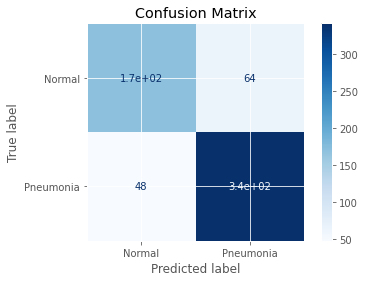

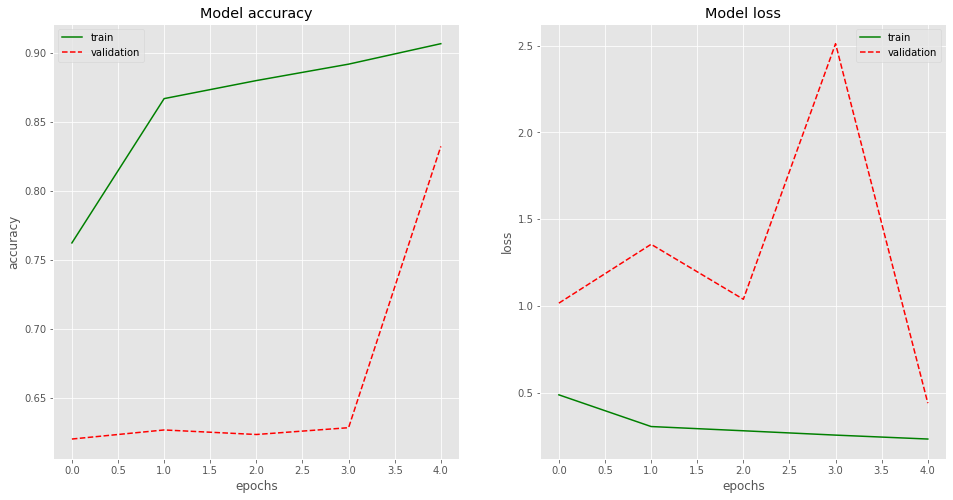

In [ ]:
visualization(history, model_drop)